## Tugas Komputasi Cerdas Backpropagation dan XOR Gate



```
# This is formatted as code
```

**Nama Kelompok:**
<br>Ali Ridho 21060120130112
<br>Fajrul Kamal 21060120130082
<br>Lukman Sanusi 21060120130140
<br>Miftahul Ilmanudin 21060120130094
<br>Steven Ardi Christianto 21060120130069

**Langkah Pertama**
<br>1. Load library yang diperlukan untuk menjalankan metode machine learning yang dilakukan. yaitu numpy dan matplotlib untuk menggambarkan grafik loss function nya.
<br>2. Tentukan Input dan Output dari XOR Gate nya, karena terdapat dua buah input. maka kombinasi input dan output yang bisa terjadi adalah:
<br>Input = [0, 0], [0, 1], [1, 0], [1, 1]
<br>Output = [0], [1], [1], [0]

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#Menentukan kombinasi input dan output pada gerbang XOR
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

**Langkah Kedua**
<br>Tentukan parameter pada neural network yang akan digunakan, yaitu:
<br>a.) dimensi input: 2 
<br>b.) dimensi layer hidden: 2
<br>c.) dimensi layer output: 1
<br>d.) learning rate: 0.1
<br>e.) epoch pelatihan model: 10000

In [33]:
# Menentukan parameter neural network
input_dim = 2
hidden_dim = 2
output_dim = 1
learning_rate = 0.1
epochs = 10000

**Langkah Ketiga**
<br>Menggunakan random seeding, kita tentukan weight dan biasnya secara random untuk melatih model dengan data yang digenerate secara random dengan variasi yang banyak pada layer hidden model.

In [34]:
# Gunakan random seed untuk menentukan weight dan bias pada layer hidden
np.random.seed(0)
w1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
w2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

**Langkah Keempat**
<br>Definisikan fungsi aktivasi untuk layer hidden.
<br>Fungsi aktivasi sigmoid digunakan karena neural network memprediksi sebuah output biner dari dua buah input pada gerbang XOR.

In [35]:
# Activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

**Langkah Kelima**
<br>Tentukan turunan fungsi sigmoid untuk menghitung backpropagation dari model yang dijalankan.

In [36]:
# Derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

**Langkah Keenam**
Melakukakan iterasi training untuk melatih model.
Langkah-langkahnya adalah:

1. Menghitung forward propagation
   pada hidden layer dilakukan training aktivasi sigmoid, menggunakan fungsi np.dot untuk menghitung kombinasi output dari gerbang XOR

2. Menghitung loss dari model (menggunakan loss MSE),
   kemudian perhitungan loss function dimasukkan untuk tiap 1000 epochs kedalam array loss_history untuk ditampilkan pada grafik.

3. Menghitung backpropagation
   Menghitung kesalahan (error) antara output yang dihasilkan dan target yang diharapkan.
   
   Menghitung delta (perubahan bobot) untuk bobot antara lapisan tersembunyi (hidden layer) dan lapisan output, dengan mengalikan kesalahan dengan turunan fungsi sigmoid dari hasil perkalian dot antara keluaran lapisan tersembunyi dan bobot lapisan output.
   
   Menghitung delta (perubahan bobot) untuk bobot antara lapisan input dan lapisan tersembunyi, dengan mengalikan hasil perkalian dot antara delta_output dan transpose bobot lapisan output dengan turunan fungsi sigmoid dari hasil perkalian dot antara data pelatihan dan bobot lapisan input.

4. Memperbarui beban dan bias
  
   Dengan tujuan sebagai bagian dari proses pelatihan untuk memperbaiki kinerja jaringan dan meningkatkan kemampuan prediksi.

5. Mencetak loss setiap 500 epoch



In [37]:
# Training loop
loss_history = []
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_output = sigmoid(np.dot(x_train, w1) + b1)
    output = sigmoid(np.dot(hidden_layer_output, w2) + b2)

    # Calculate the loss (mean squared error)
    loss = np.mean((output - y_train) ** 2)
    loss_history.append(loss)

    # Backpropagation
    error = output - y_train
    delta_output = error * sigmoid_derivative(np.dot(hidden_layer_output, w2) + b2)
    delta_hidden = np.dot(delta_output, w2.T) * sigmoid_derivative(np.dot(x_train, w1) + b1)

    # Update the weights and biases
    w2 -= learning_rate * np.dot(hidden_layer_output.T, delta_output)
    b2 -= learning_rate * np.sum(delta_output, axis=0)
    w1 -= learning_rate * np.dot(x_train.T, delta_hidden)
    b1 -= learning_rate * np.sum(delta_hidden, axis=0)

    # Print the loss at every 1000 epochs
    if epoch % 500 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.6f}")



Epoch: 0, Loss: 0.269637
Epoch: 500, Loss: 0.207140
Epoch: 1000, Loss: 0.175006
Epoch: 1500, Loss: 0.156230
Epoch: 2000, Loss: 0.146131
Epoch: 2500, Loss: 0.140374
Epoch: 3000, Loss: 0.136835
Epoch: 3500, Loss: 0.134505
Epoch: 4000, Loss: 0.132882
Epoch: 4500, Loss: 0.131699
Epoch: 5000, Loss: 0.130804
Epoch: 5500, Loss: 0.130107
Epoch: 6000, Loss: 0.129551
Epoch: 6500, Loss: 0.129099
Epoch: 7000, Loss: 0.128724
Epoch: 7500, Loss: 0.128408
Epoch: 8000, Loss: 0.128140
Epoch: 8500, Loss: 0.127909
Epoch: 9000, Loss: 0.127708
Epoch: 9500, Loss: 0.127532


**Langkah ketujuh**

Setelah model dilakukan iterasi training, kemudian ditampilkan hasil perhitungan loss function kedalam grafik menggunakan fungsi dari library matplotlib. 

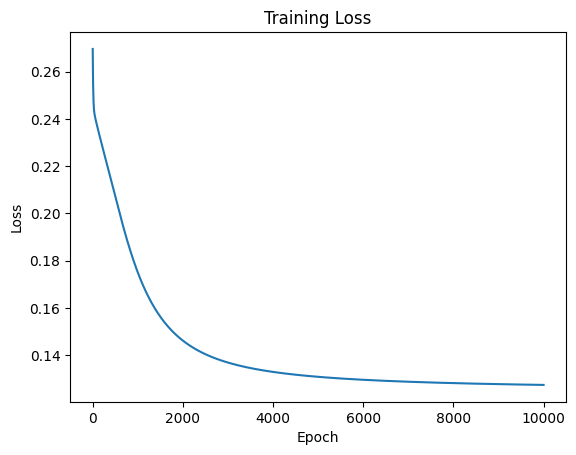

In [40]:
# Plot the loss function
plt.plot(range(epochs), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Terakhir, model yang sebelumnya sudah dibuat dicoba untuk melakukan prediksi.

In [41]:
# Perform prediction on custom input
custom_input = np.array([[1, 0]])
hidden_layer_output_custom = sigmoid(np.dot(custom_input, w1) + b1)
output_custom = sigmoid(np.dot(hidden_layer_output_custom, w2) + b2)

# Apply threshold for prediction
threshold = 0.5
prediction = 1 if output_custom >= threshold else 0

# Print the prediction
print("Custom Prediction: {}".format(custom_input))
print(prediction)

Custom Prediction: [[1 0]]
1


Dari prediksi dengan input array [1, 0], didapatkan hasil prediksi yaitu 1. Hal ini sesuai dengan output gerbang XOR yang sebenanrnya. Sehingga bisa disimpulkan model sudah terlatih dengan baik.